In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\samuel.hill\\sporeforecaster")

# Import PCA data
with open('data\\interim\\annual_outliers.pkl', 'rb') as f:
    imported_data = pickle.load(f)
    outliers_full_pca_res = imported_data['outliers_full_pca_res']
    pca_mods = imported_data['pca_mods']
    pca_all_selected_factors = imported_data['pca_all_selected_factors']

In [2]:
# Pull taxa-specific PCA model from nested list
def find_model(model_name, paired_list):
    for model, name in paired_list:
        if name == model_name:
            return model
    return None

In [16]:
# Plot PCA components with labels per taxa
def myplot(score_df, taxa, pca_mods, labels=None):
    plt.figure(figsize=(15, 15))   
    # Isolate taxa of interest
    # scoredf
    score_df_taxa = score_df[score_df["taxa"] == taxa].copy()
    score_df_taxa = score_df_taxa.drop("taxa", axis=1)
    # coeffs
    pca_mod = find_model(taxa, pca_mods)
    coeff = np.transpose(pca_mod.components_[0:2,:])
    # Calculate axis
    xs = score_df_taxa.iloc[:, 0]
    ys = score_df_taxa.iloc[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    # Add labels for each point using their index
    for index, row in score_df_taxa.iterrows():
        x = row[0]
        y = row[1]
        plt.scatter(x * scalex, y * scaley)
        plt.text(x * scalex, y * scaley, str(index), color='blue', fontsize=10)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-0.9, 0.9)
    plt.ylim(-0.9, 0.9)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title(taxa)


In [11]:
# Extract unique taxa names
taxa_list = []
for mod, name in pca_mods:
    taxa_list.append(name)

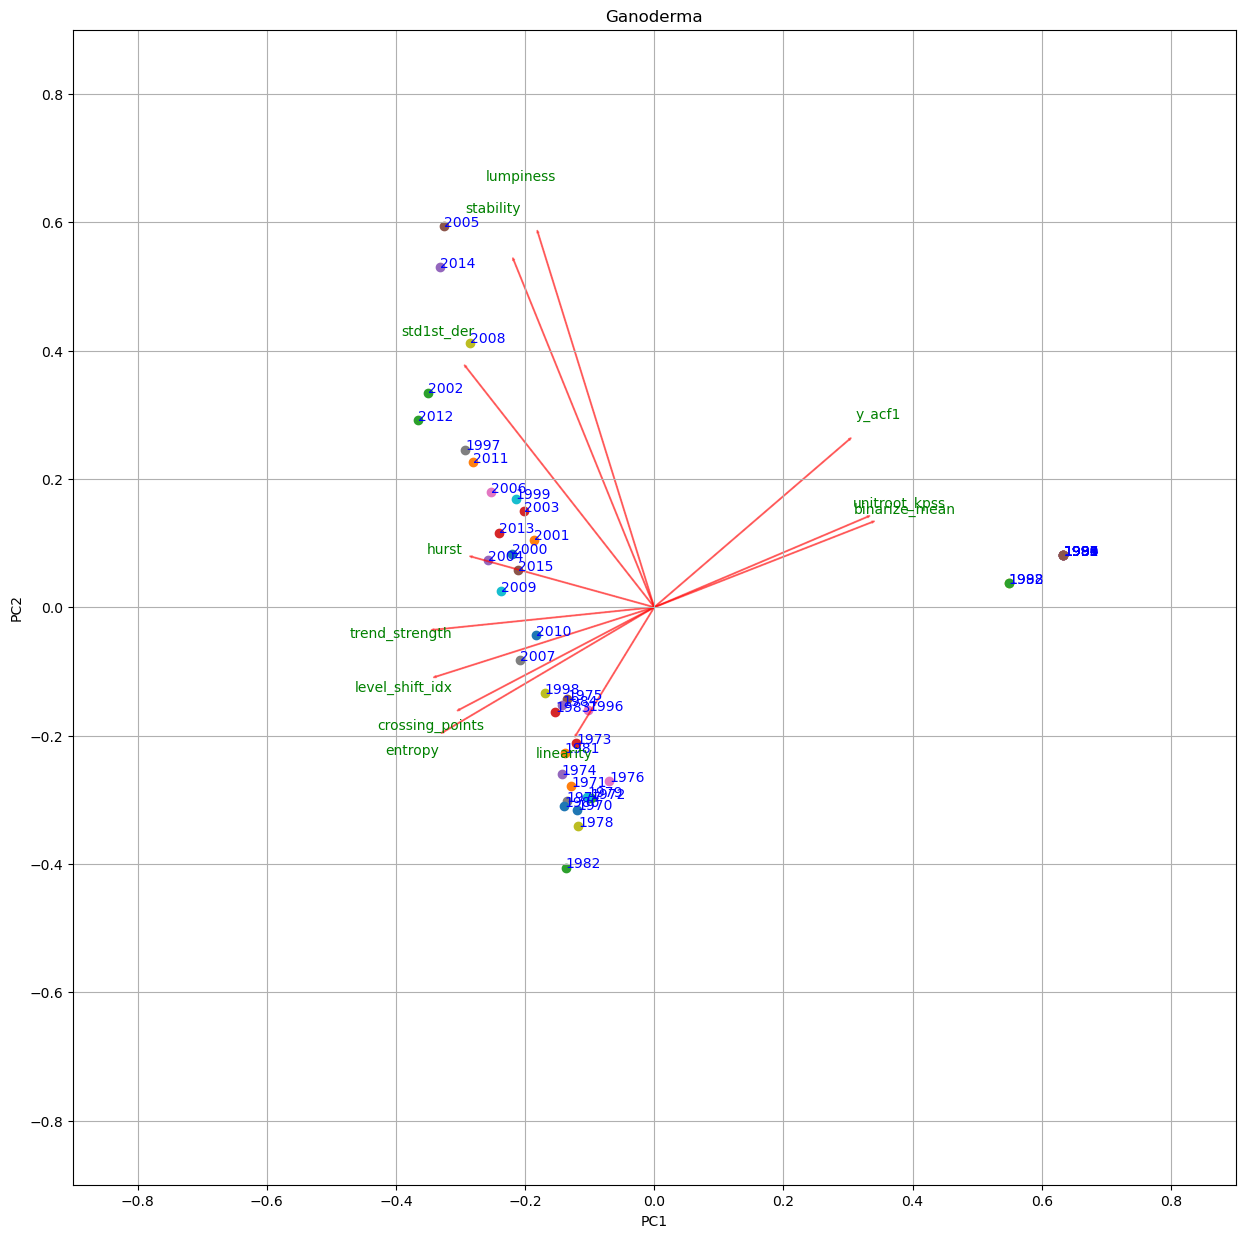

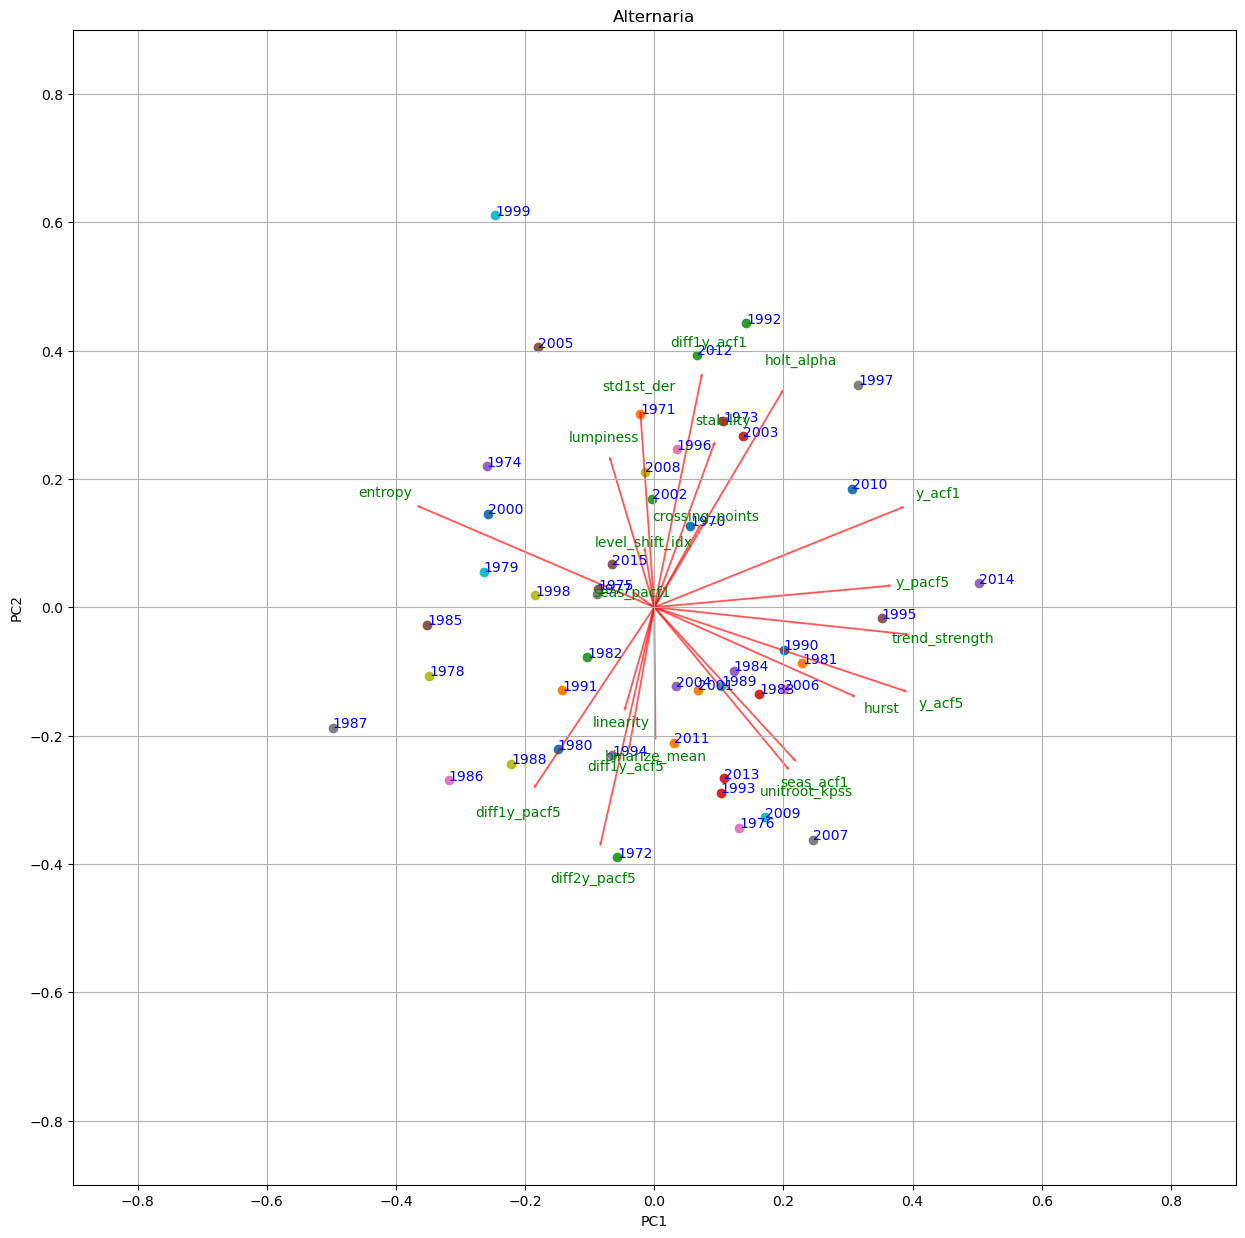

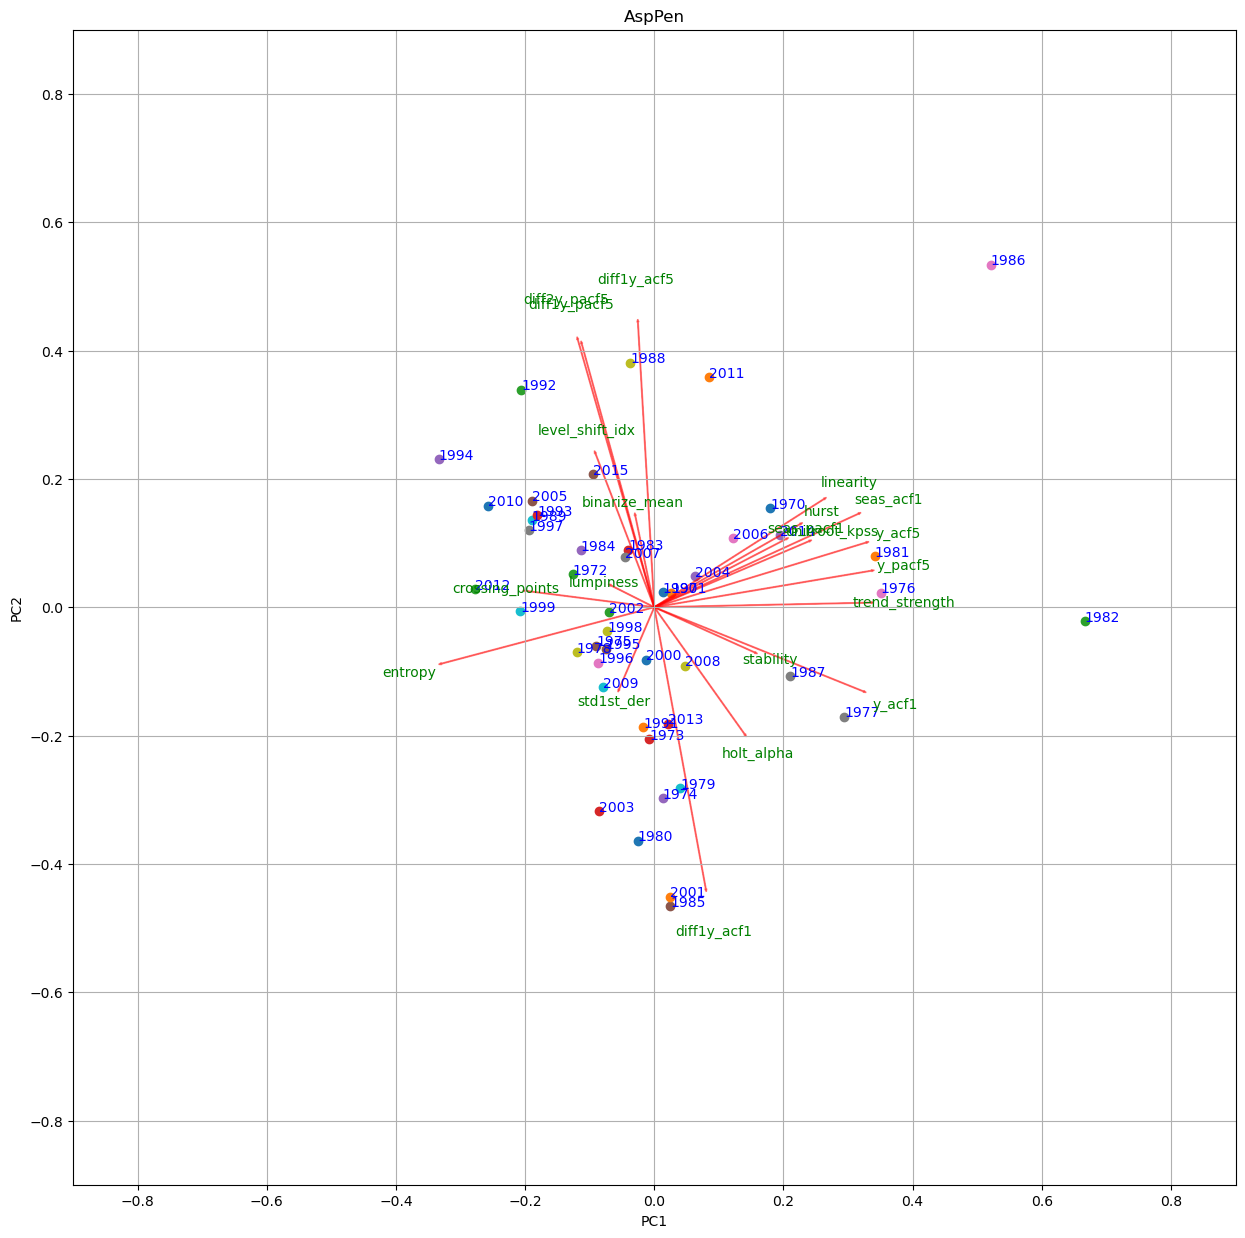

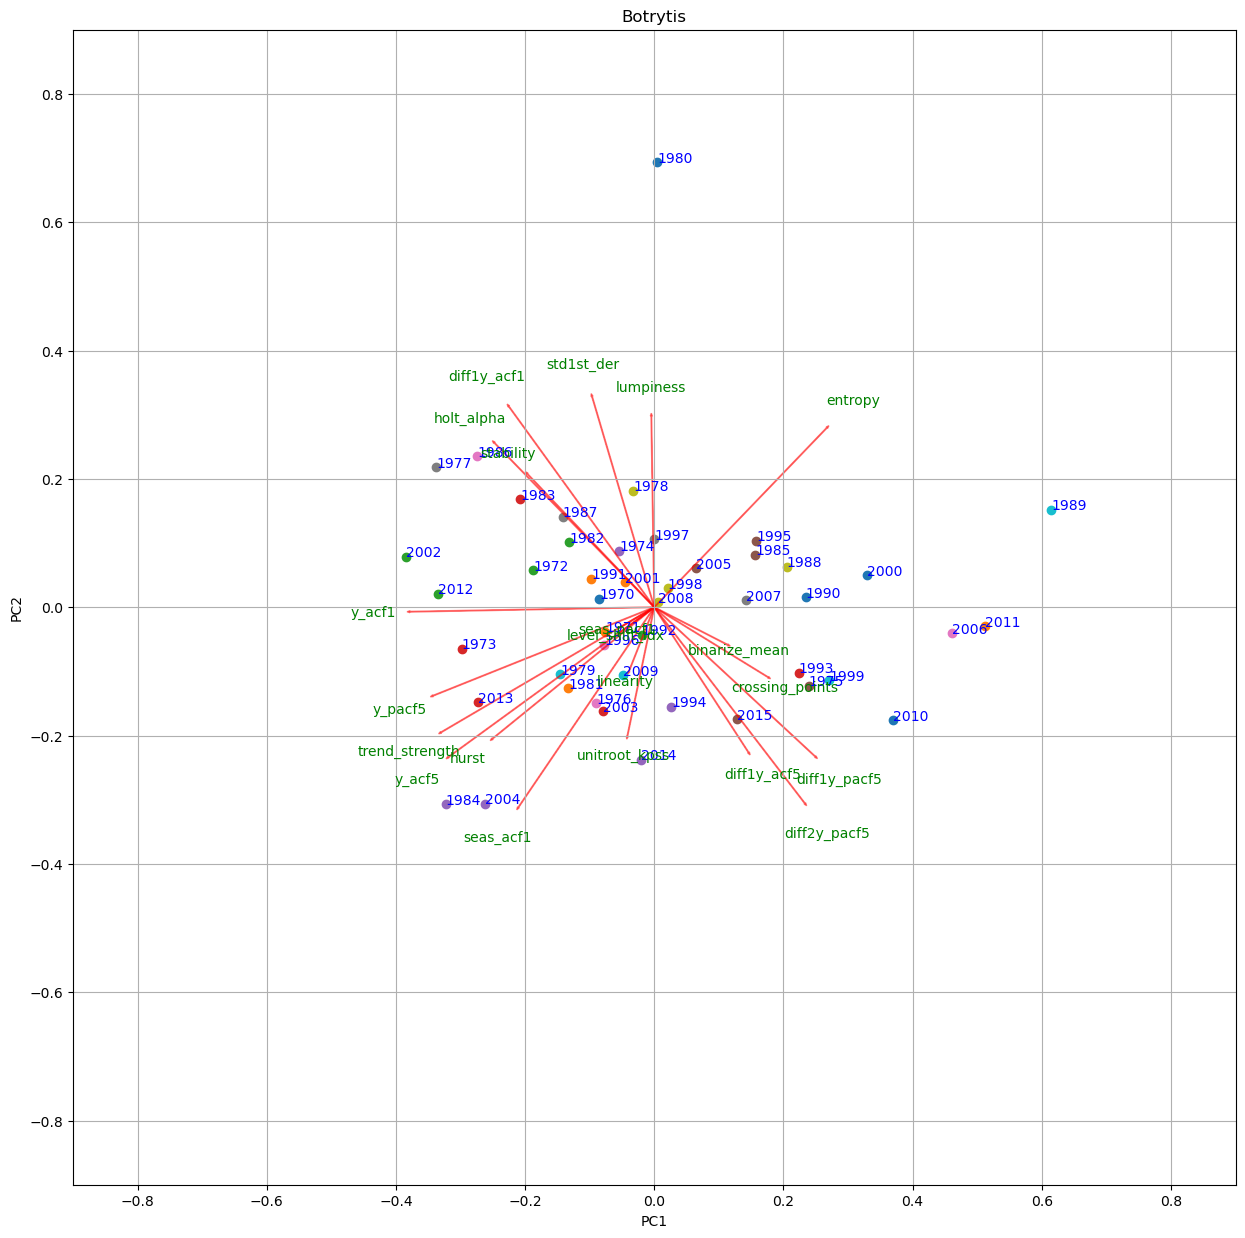

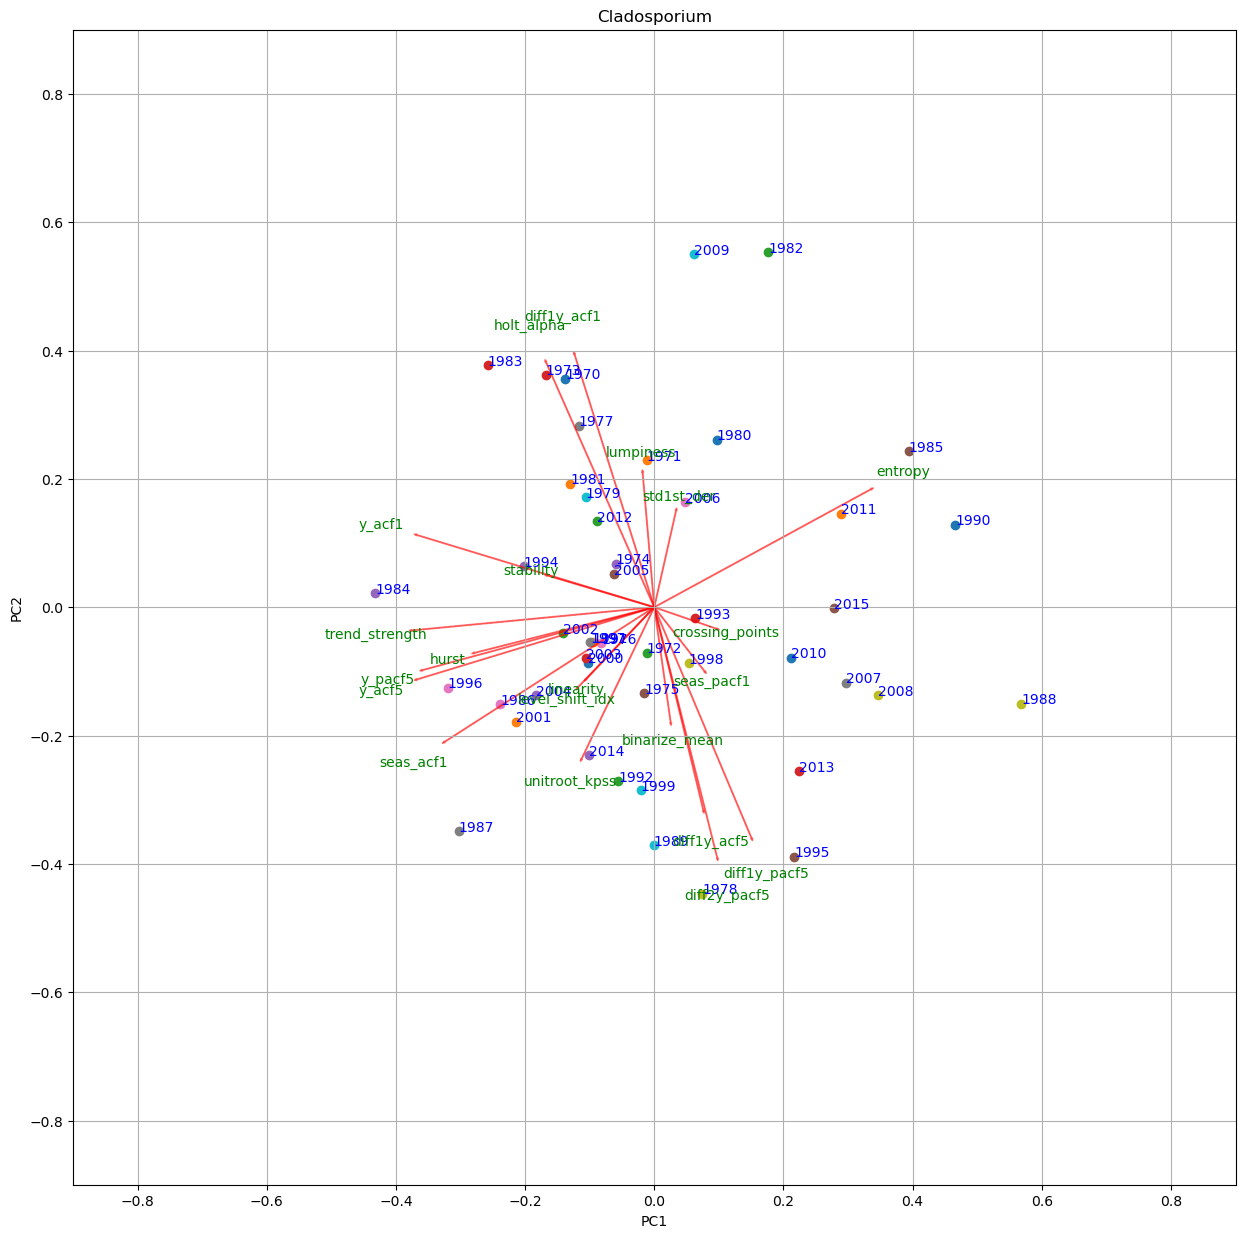

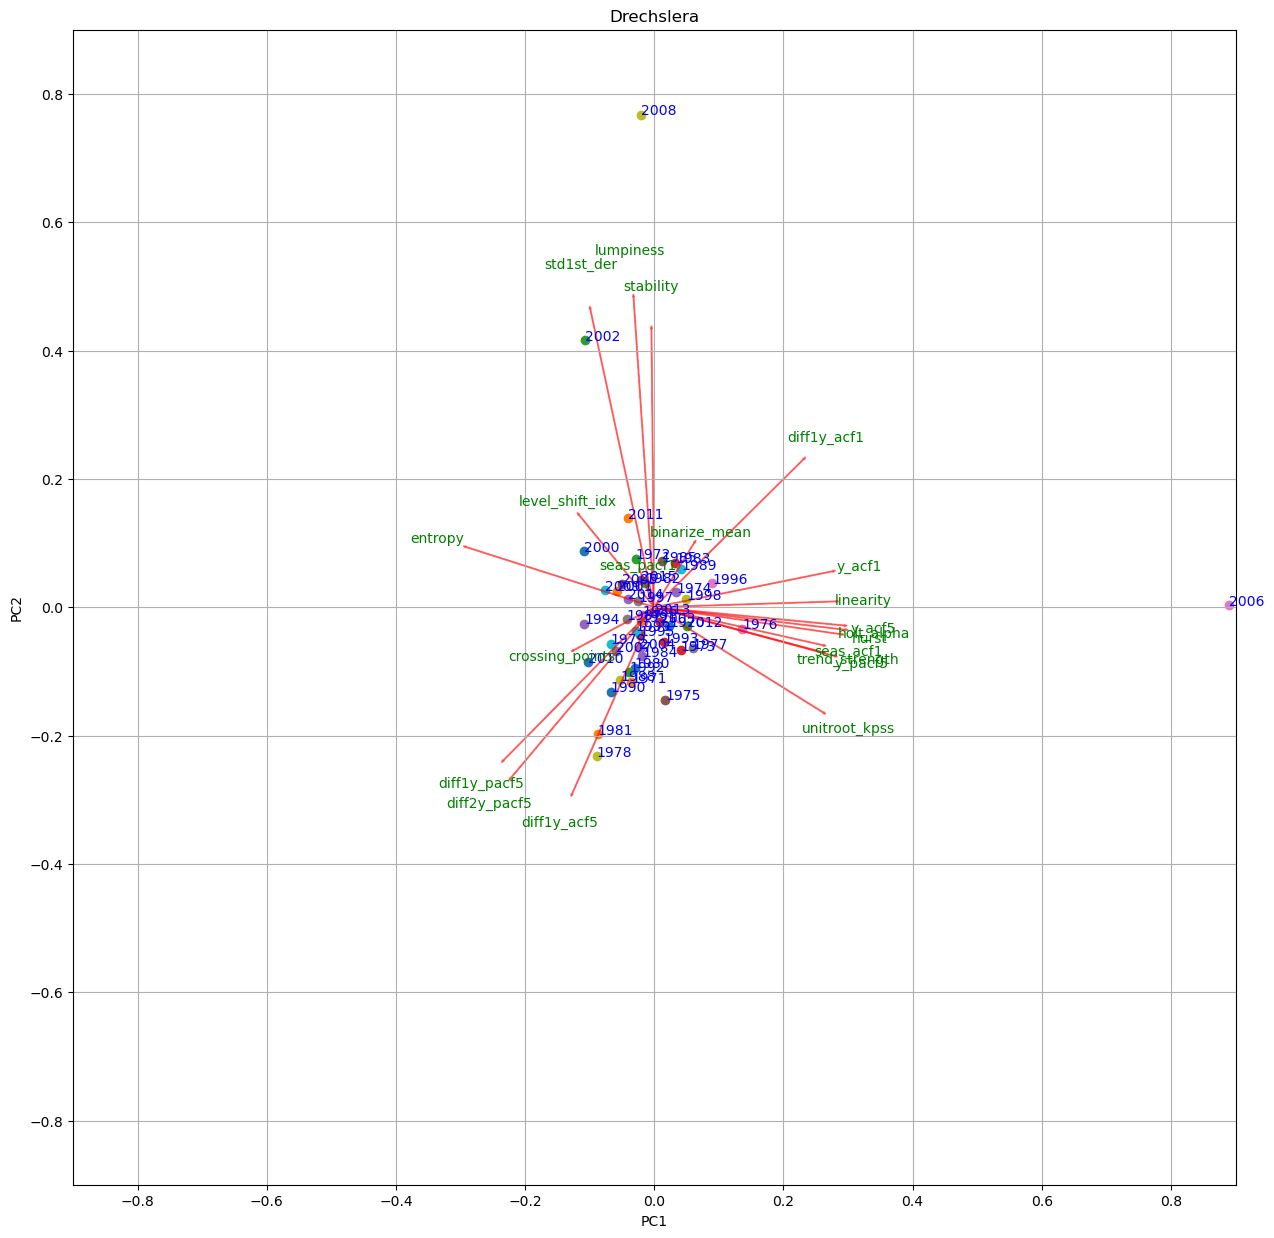

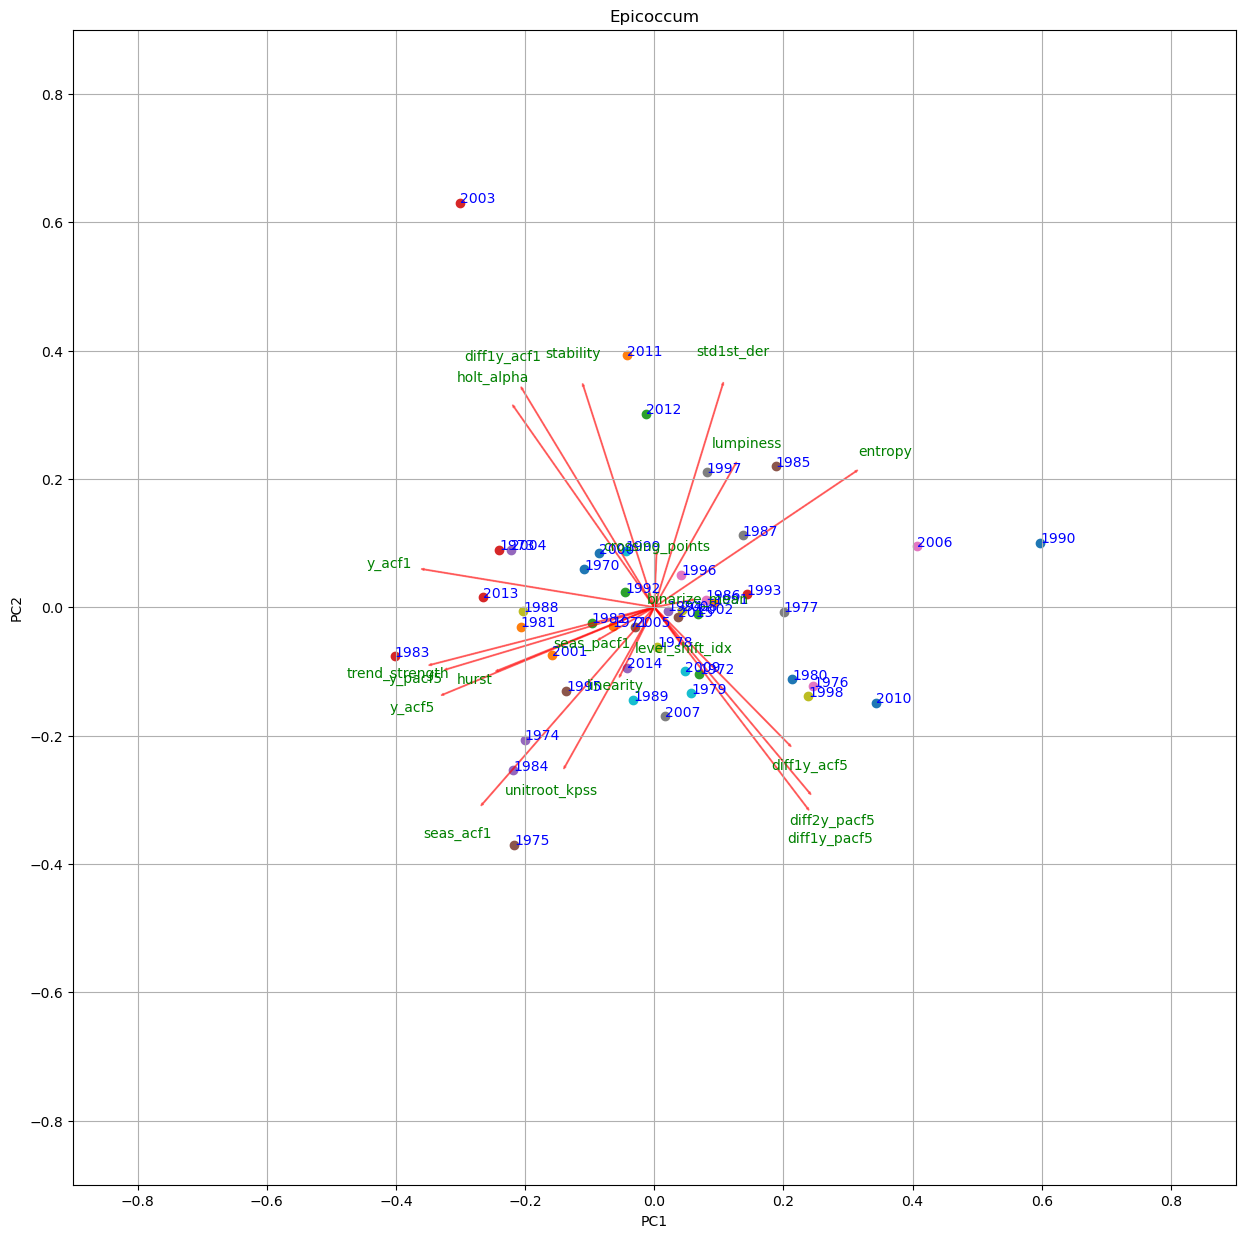

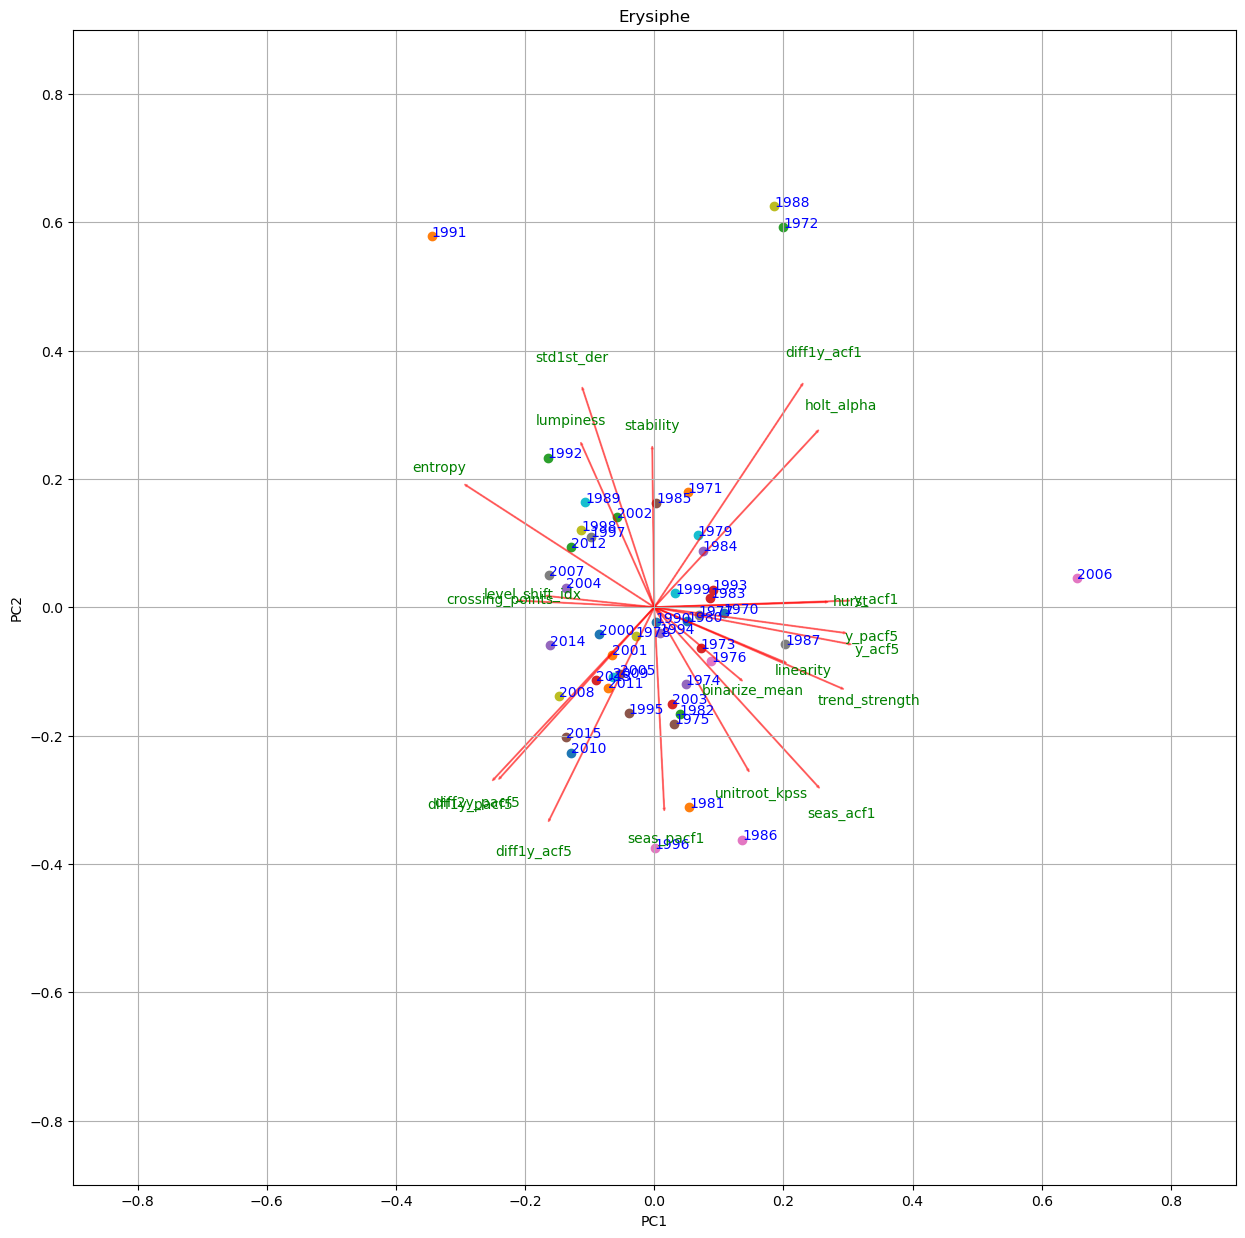

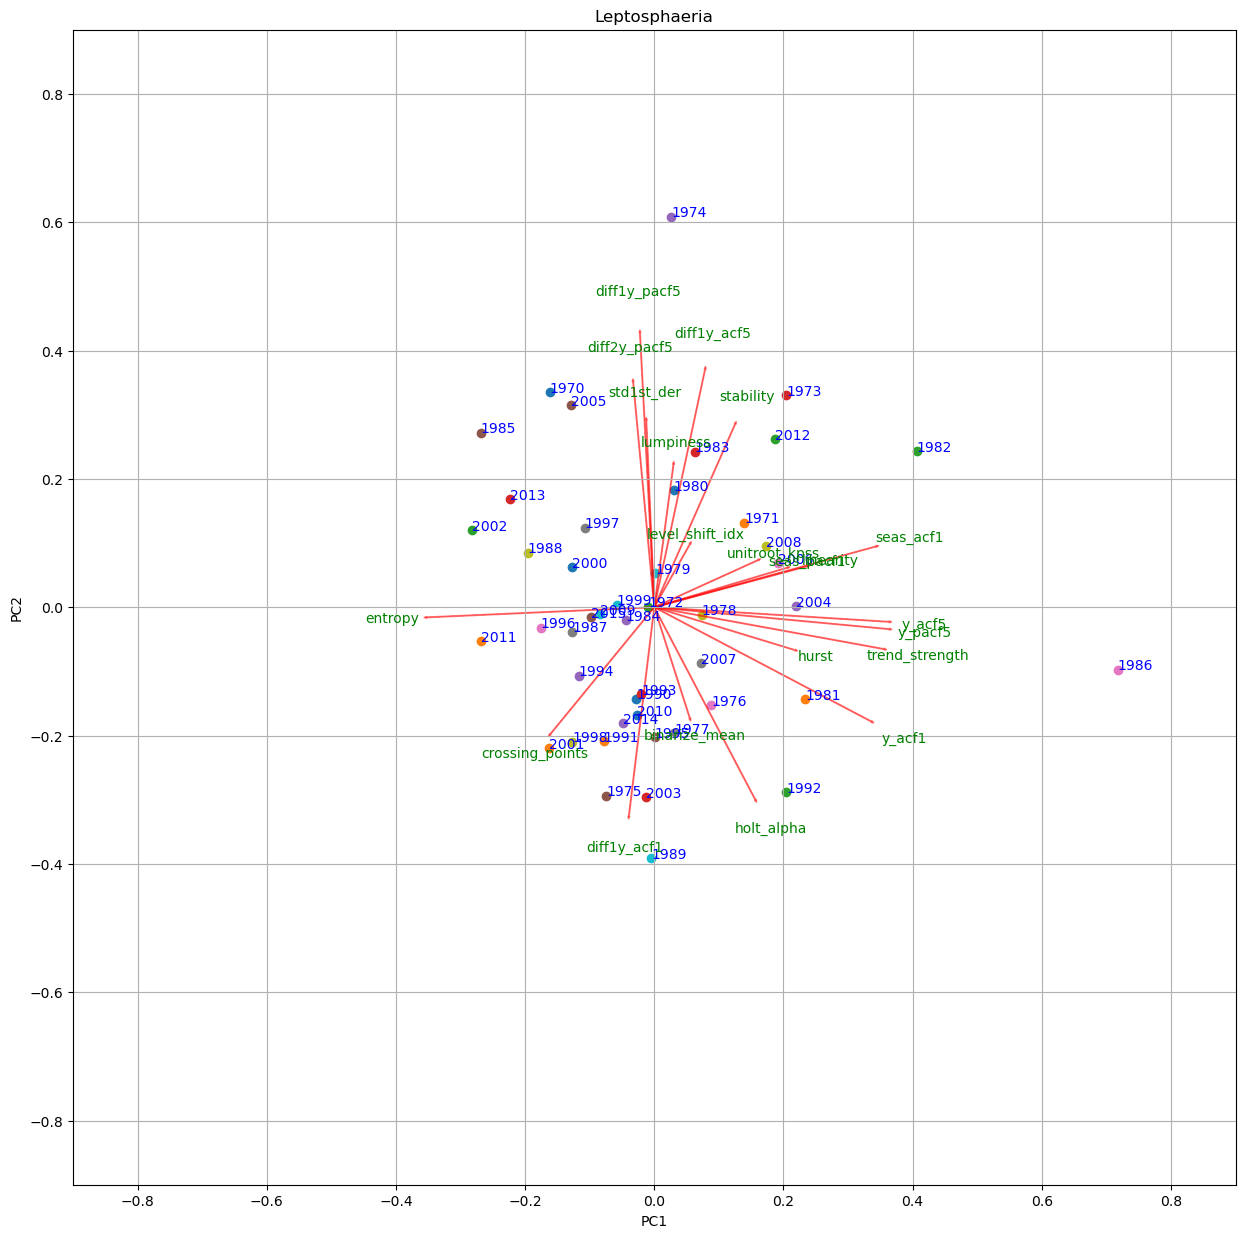

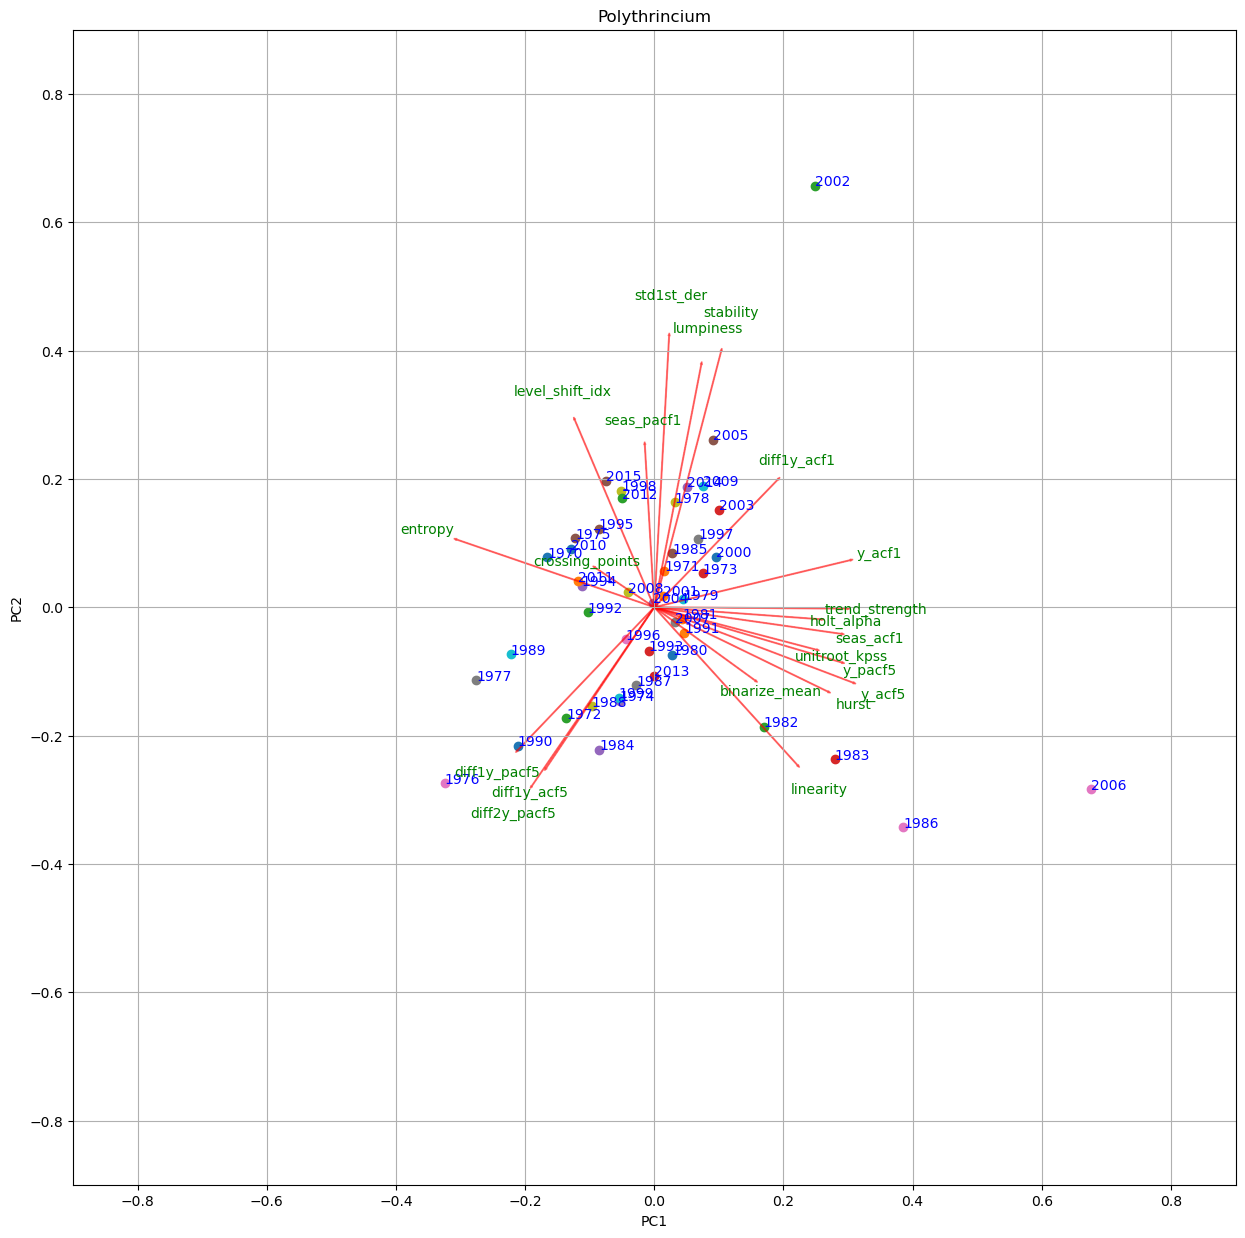

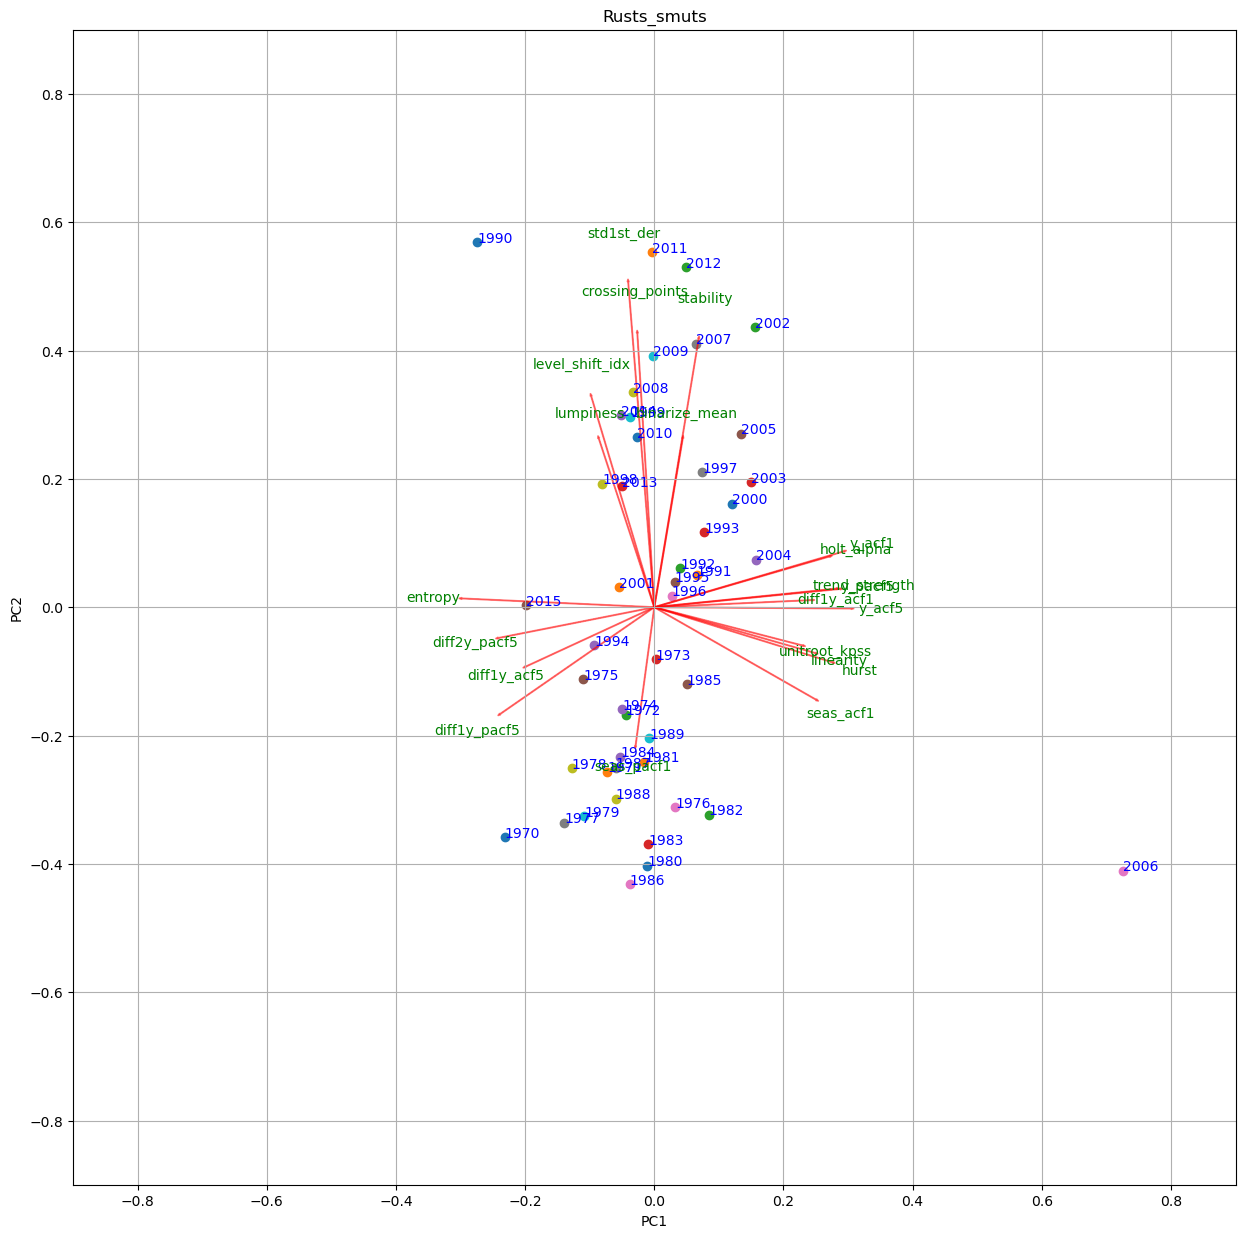

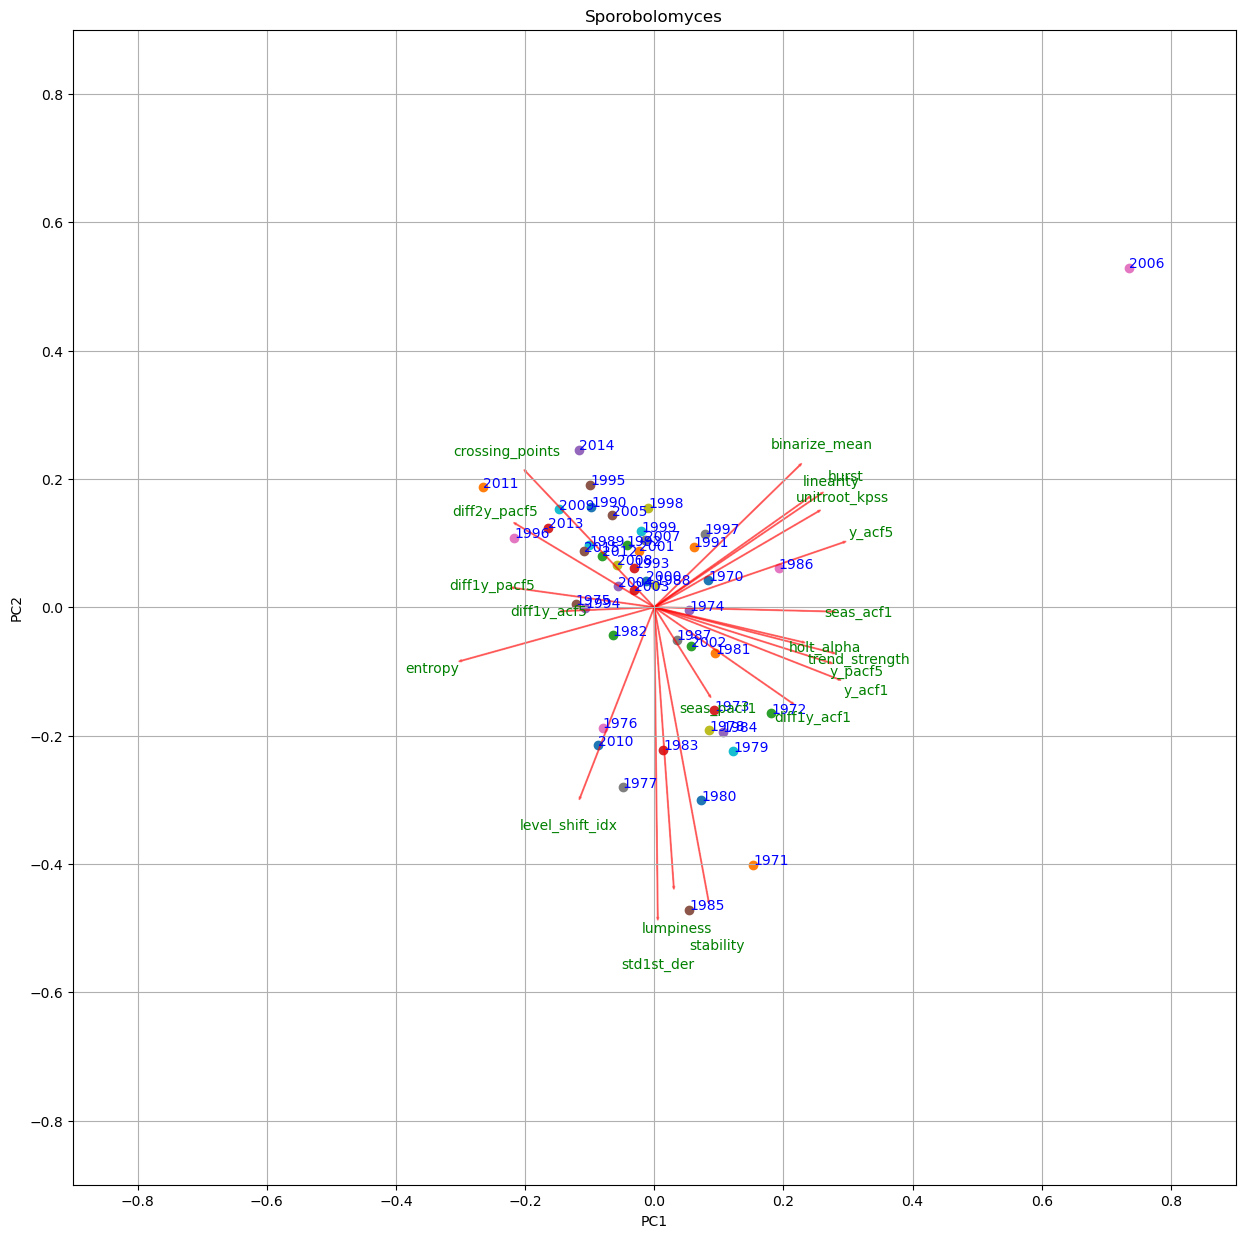

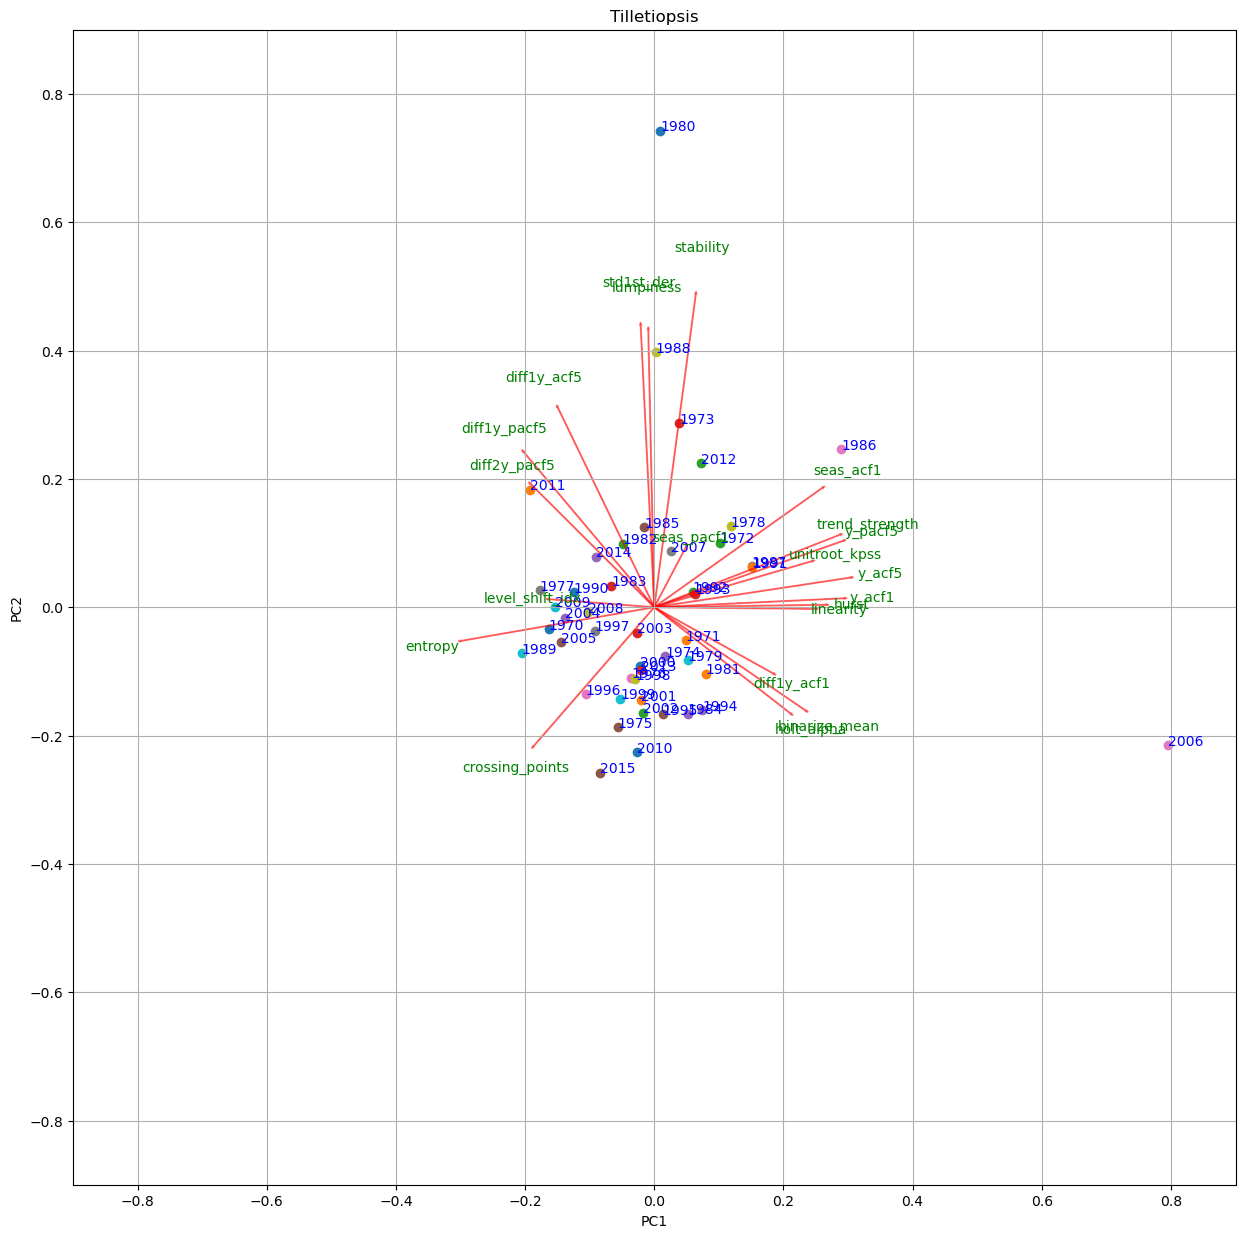

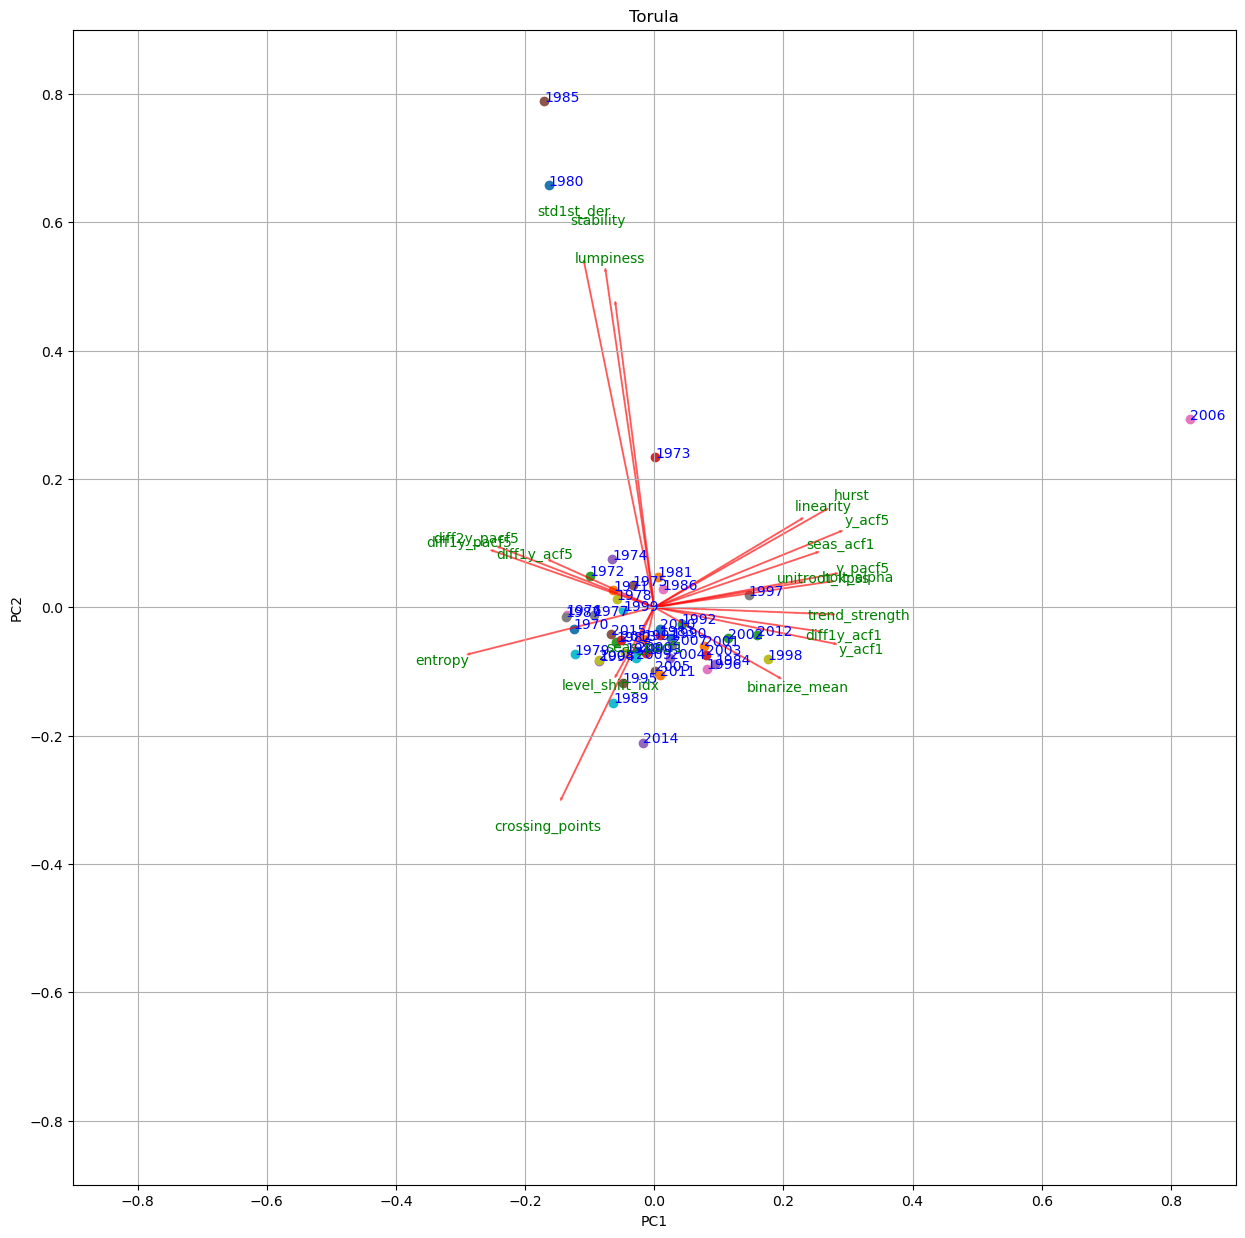

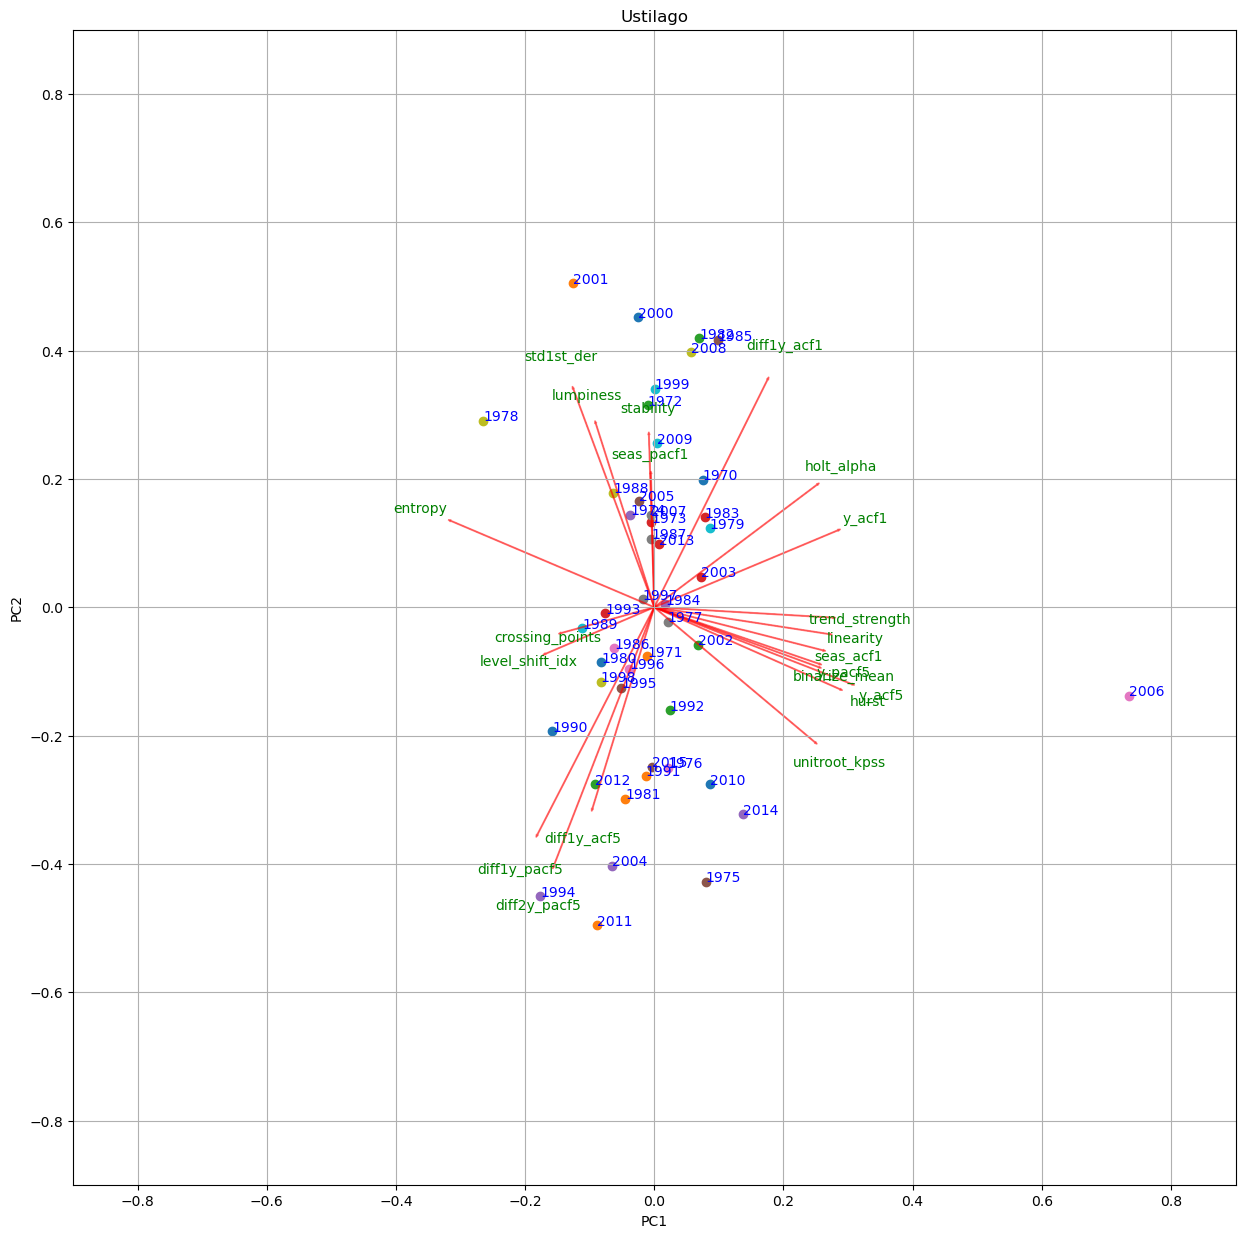

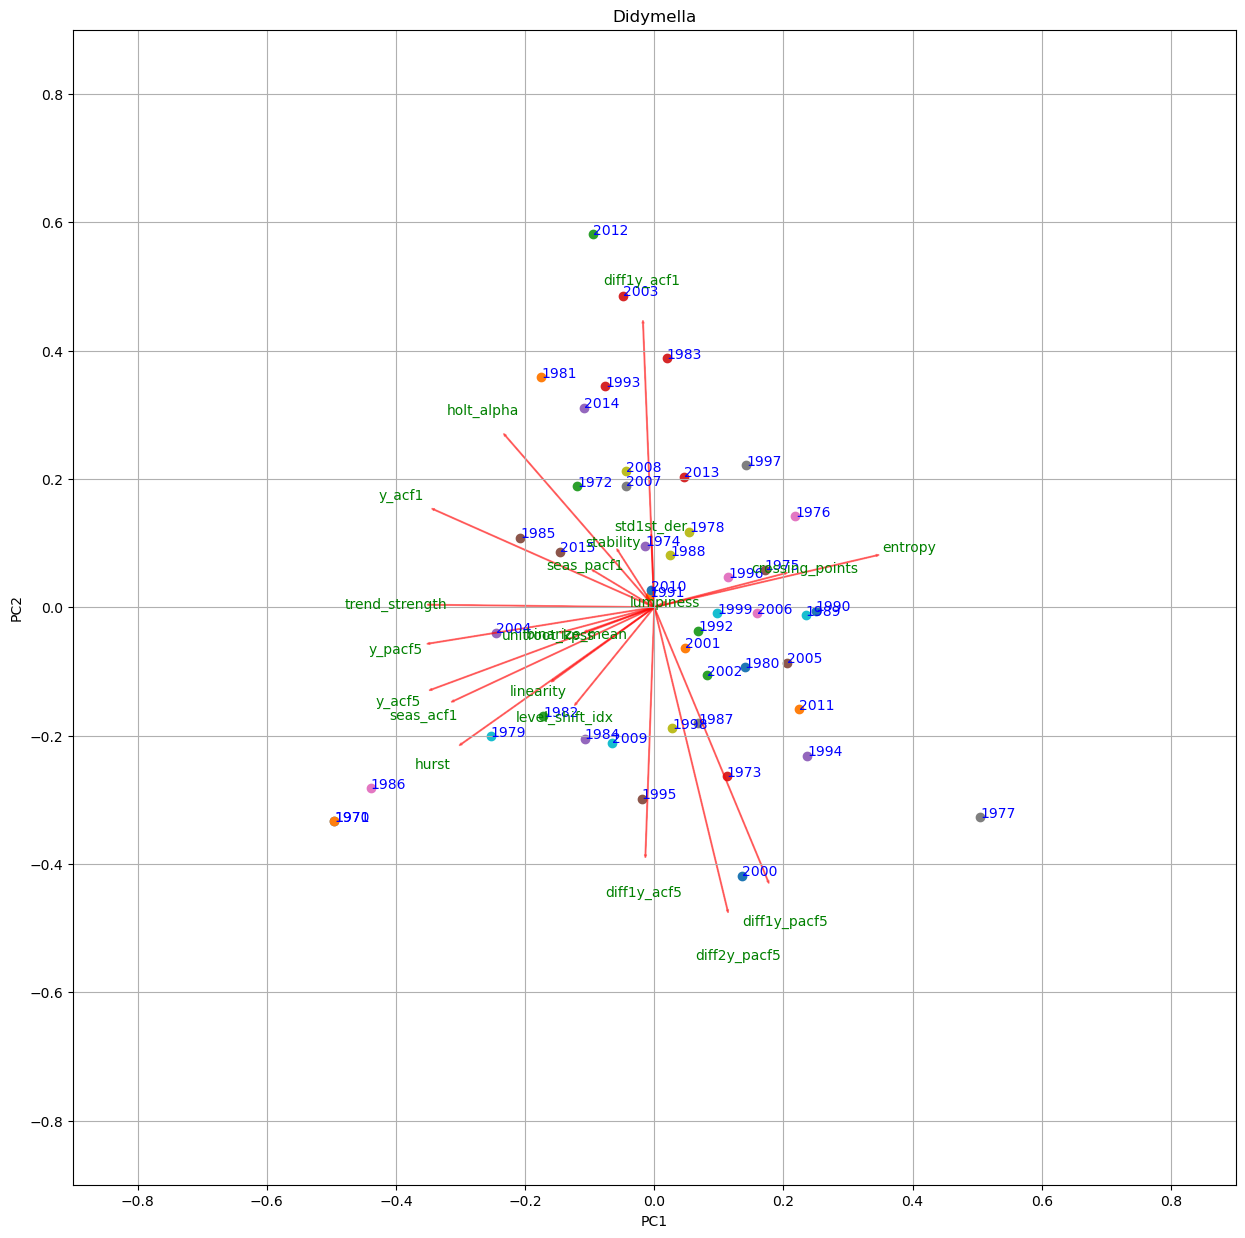

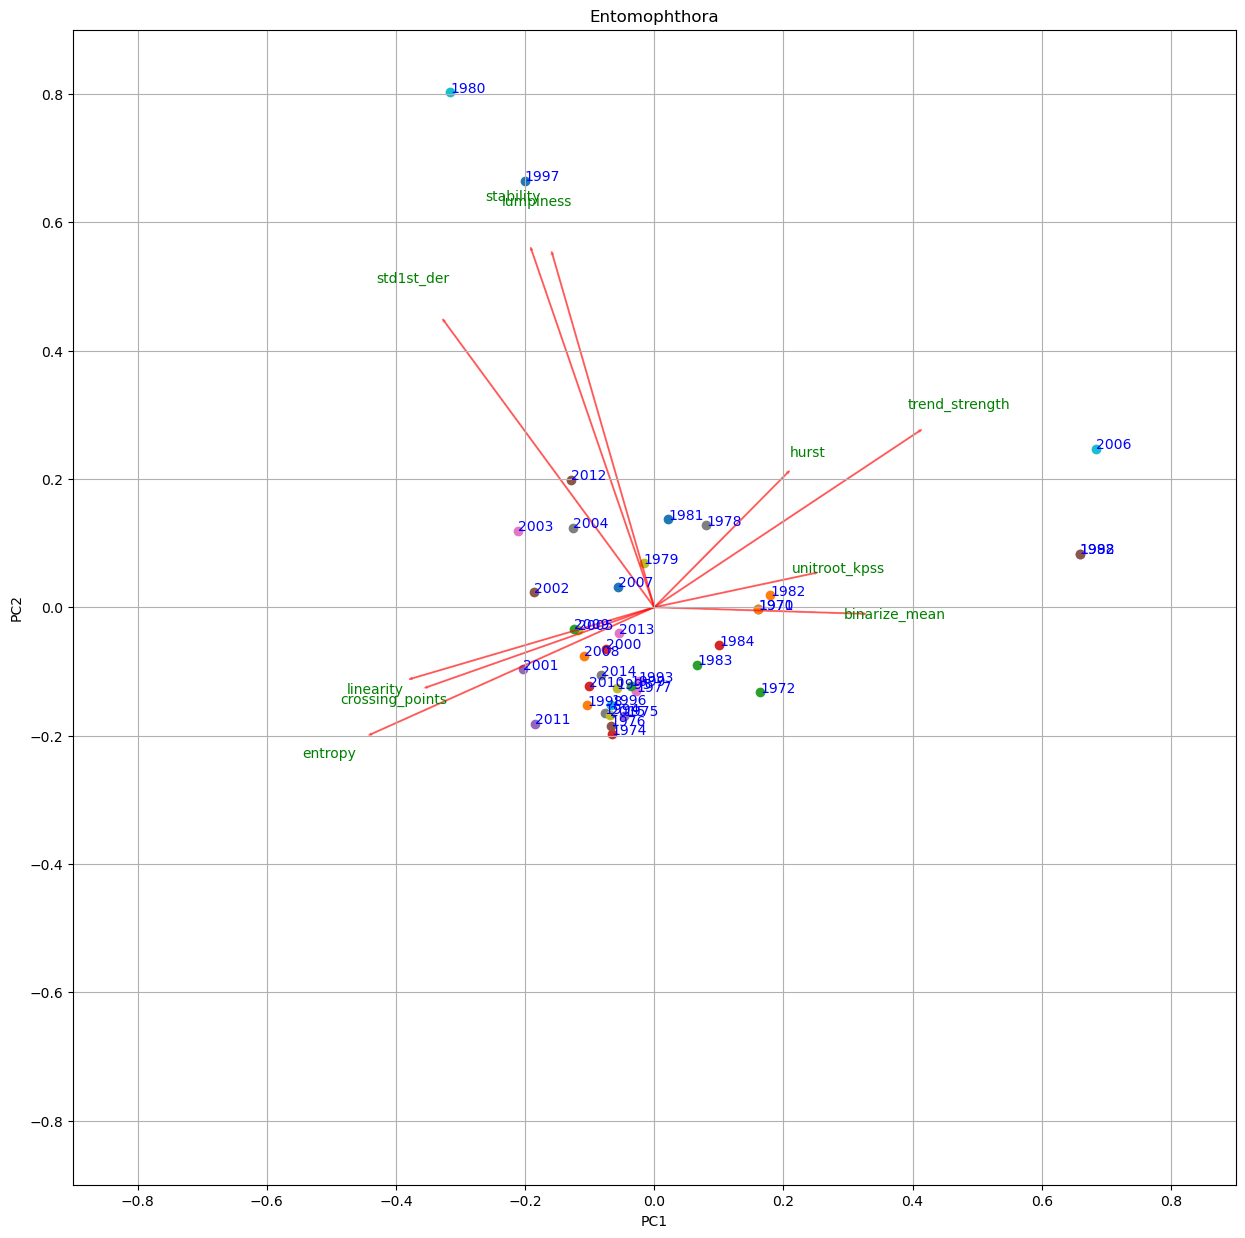

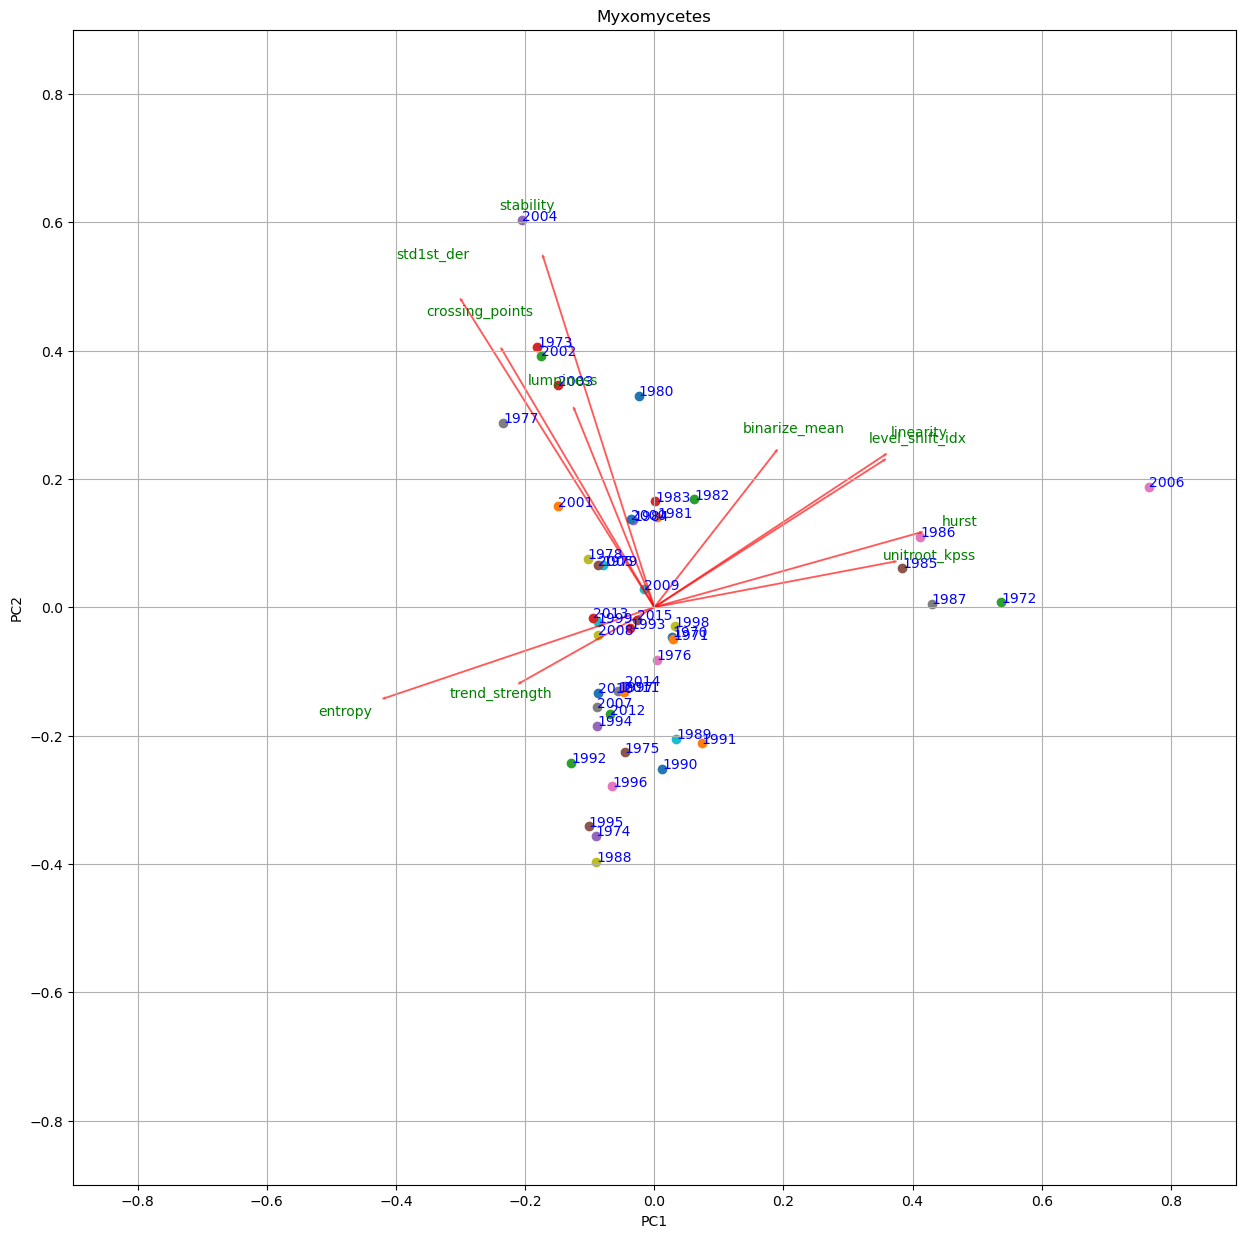

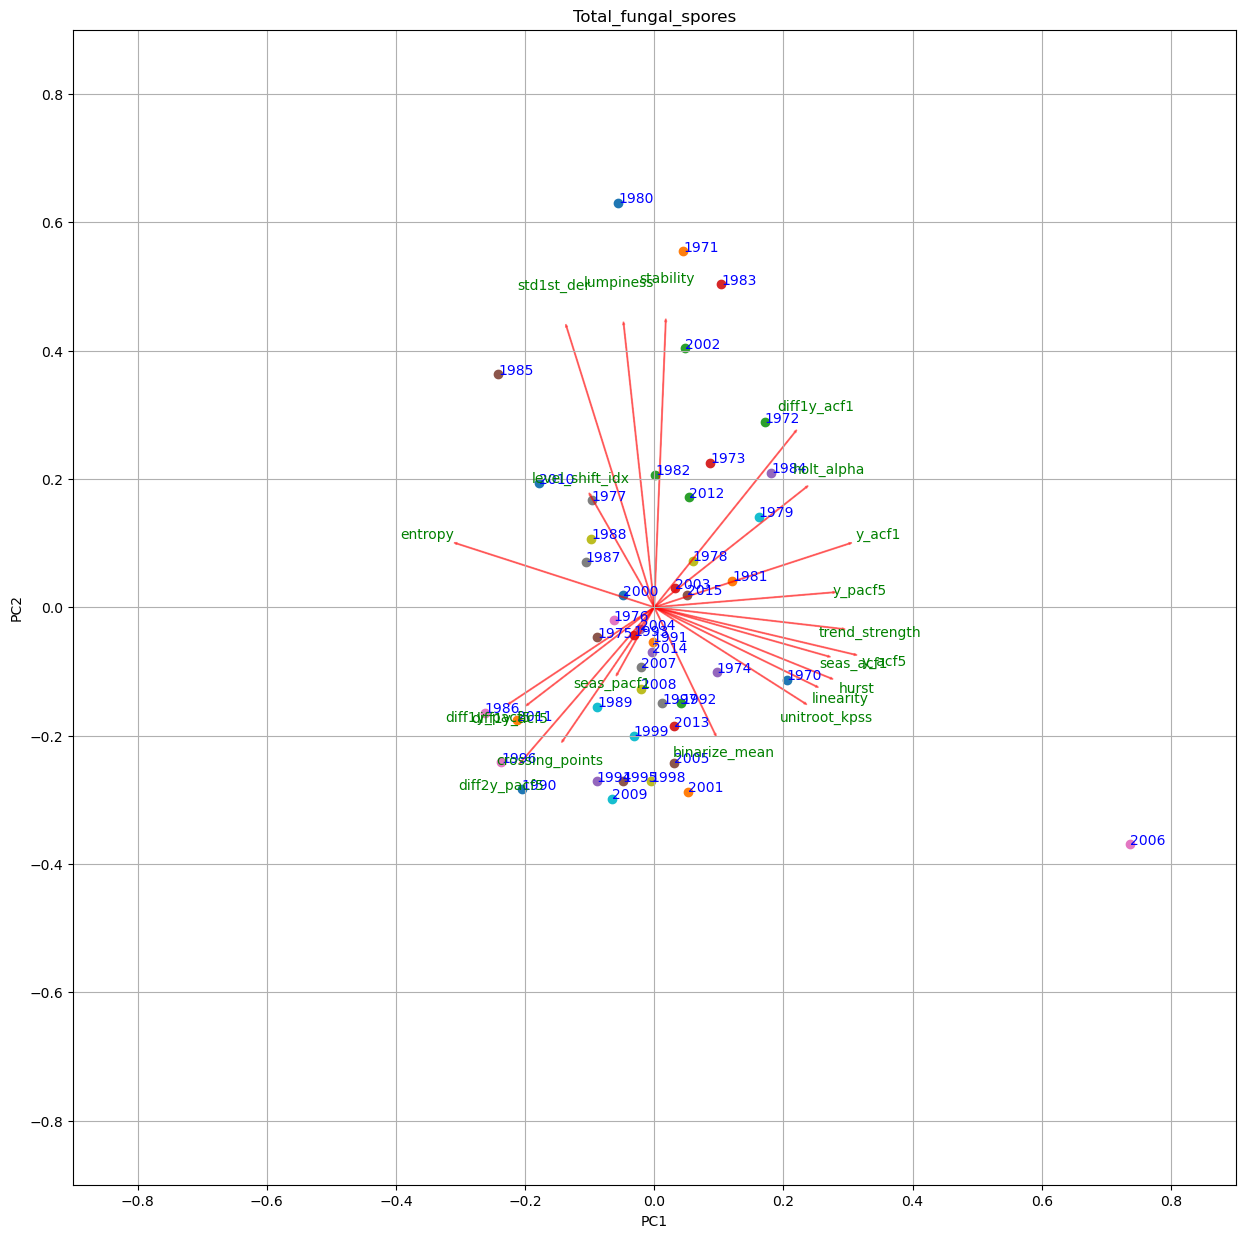

In [17]:
# Run all plots
plots = []
for taxa in taxa_list:
    plots.append(myplot(outliers_full_pca_res, taxa, pca_mods, labels=pca_all_selected_factors))